In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [13]:
df = pd.read_excel(r"C:\Users\ANCHAL\Desktop\CODING\M.L\ML PROJECT\Liver diseases prediction\Dataset.xlsx")
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [15]:
df.shape

(583, 11)

In [17]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [21]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [23]:
df.dtypes[df.dtypes=='object']

Gender    object
dtype: object

In [25]:
df['Gender']=df['Gender'].apply(lambda x:1 if x=='Male' else 0)
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


<Axes: xlabel='Gender'>

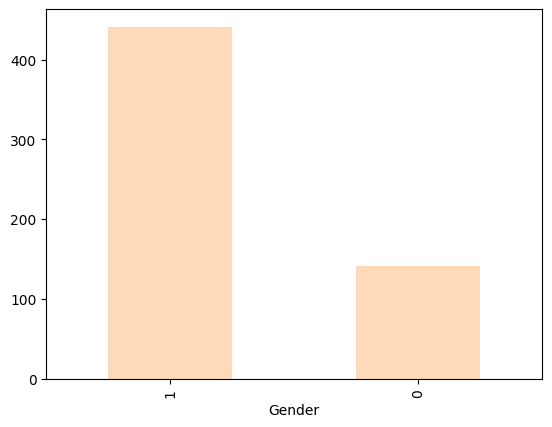

In [27]:
df['Gender'].value_counts().plot.bar(color='peachpuff')

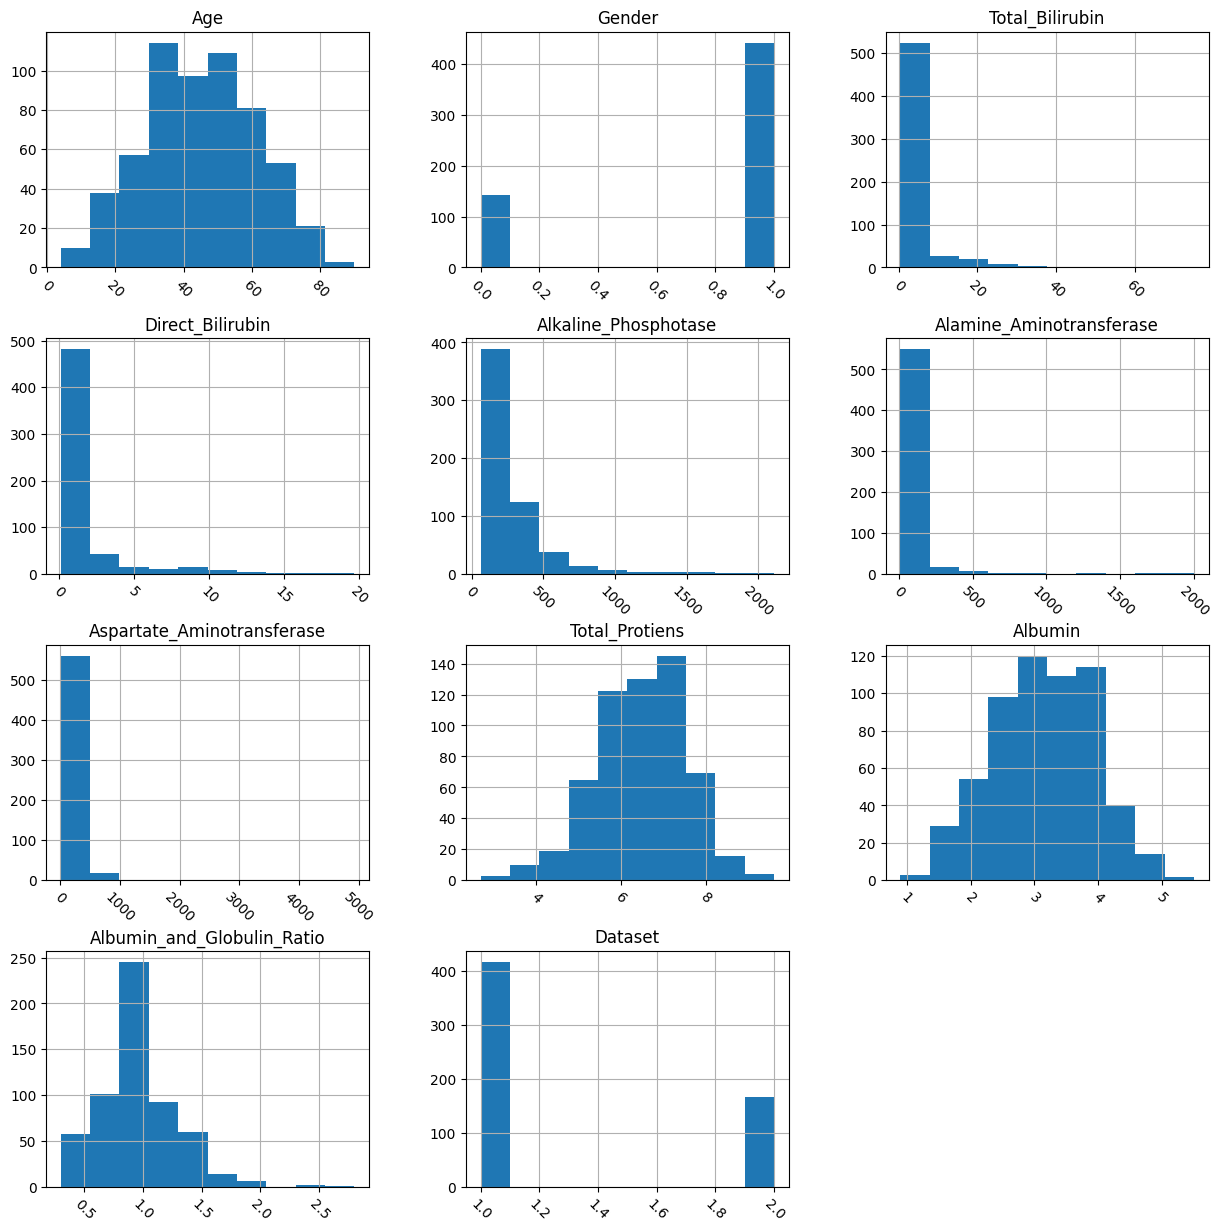

In [28]:
df.hist(figsize=(15,15), xrot=-45,bins=10)
plt.show()

In [30]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [31]:
mean = df['Albumin_and_Globulin_Ratio'].mean()

In [32]:
df=df.fillna(mean)

In [33]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

<Axes: xlabel='Age'>

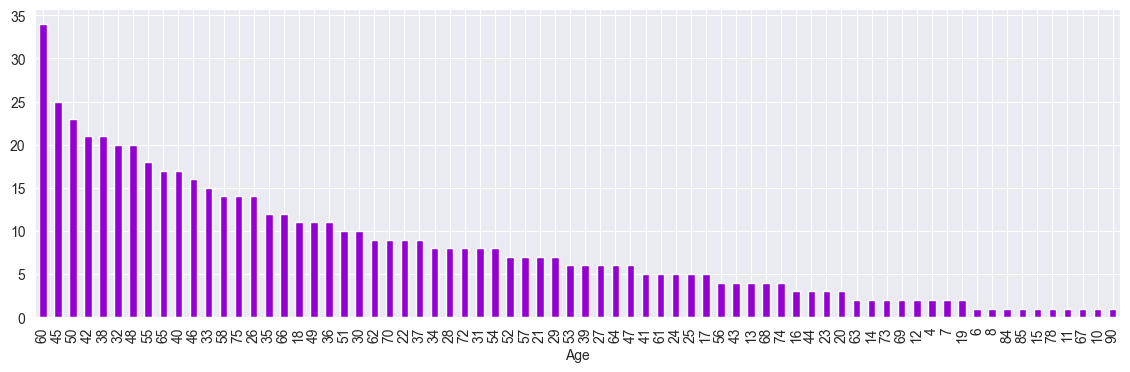

In [34]:
sns.set_style('darkgrid')
plt.figure(figsize=(14,4))
df['Age'].value_counts().plot.bar(color='darkviolet')

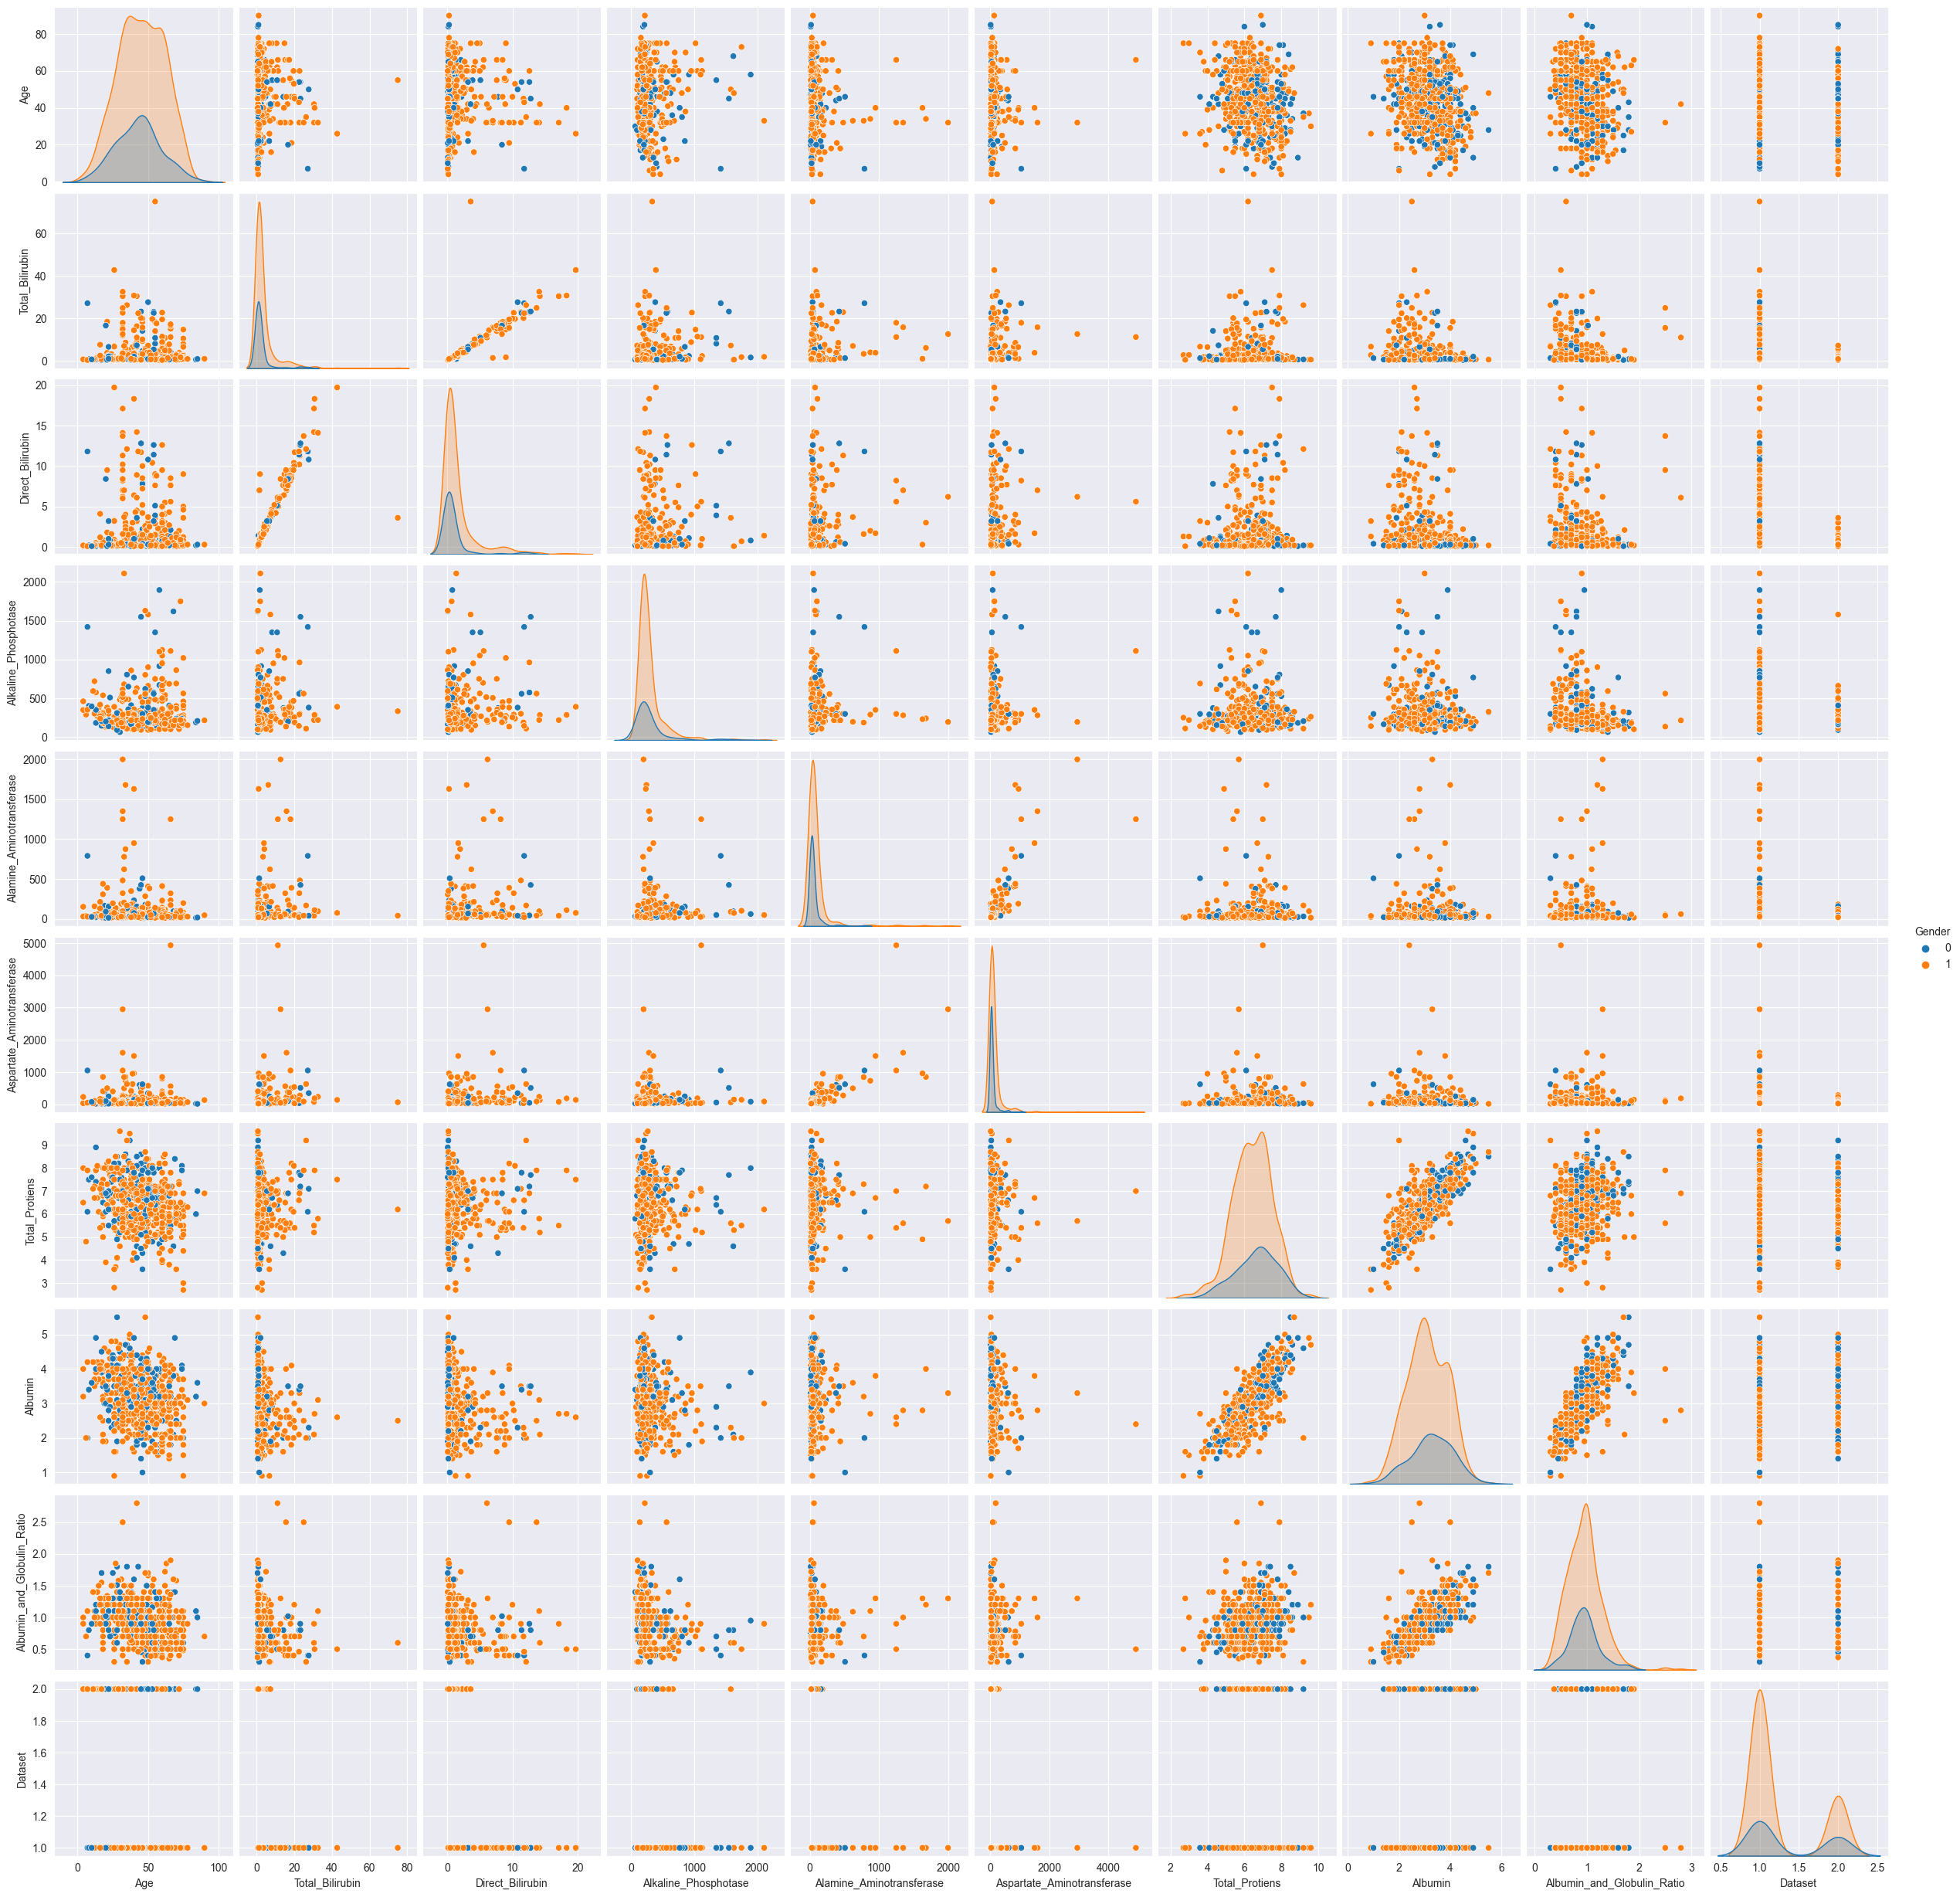

In [40]:
plt.rcParams['figure.figsize']=(8,8)
sns.pairplot(df,hue='Gender')

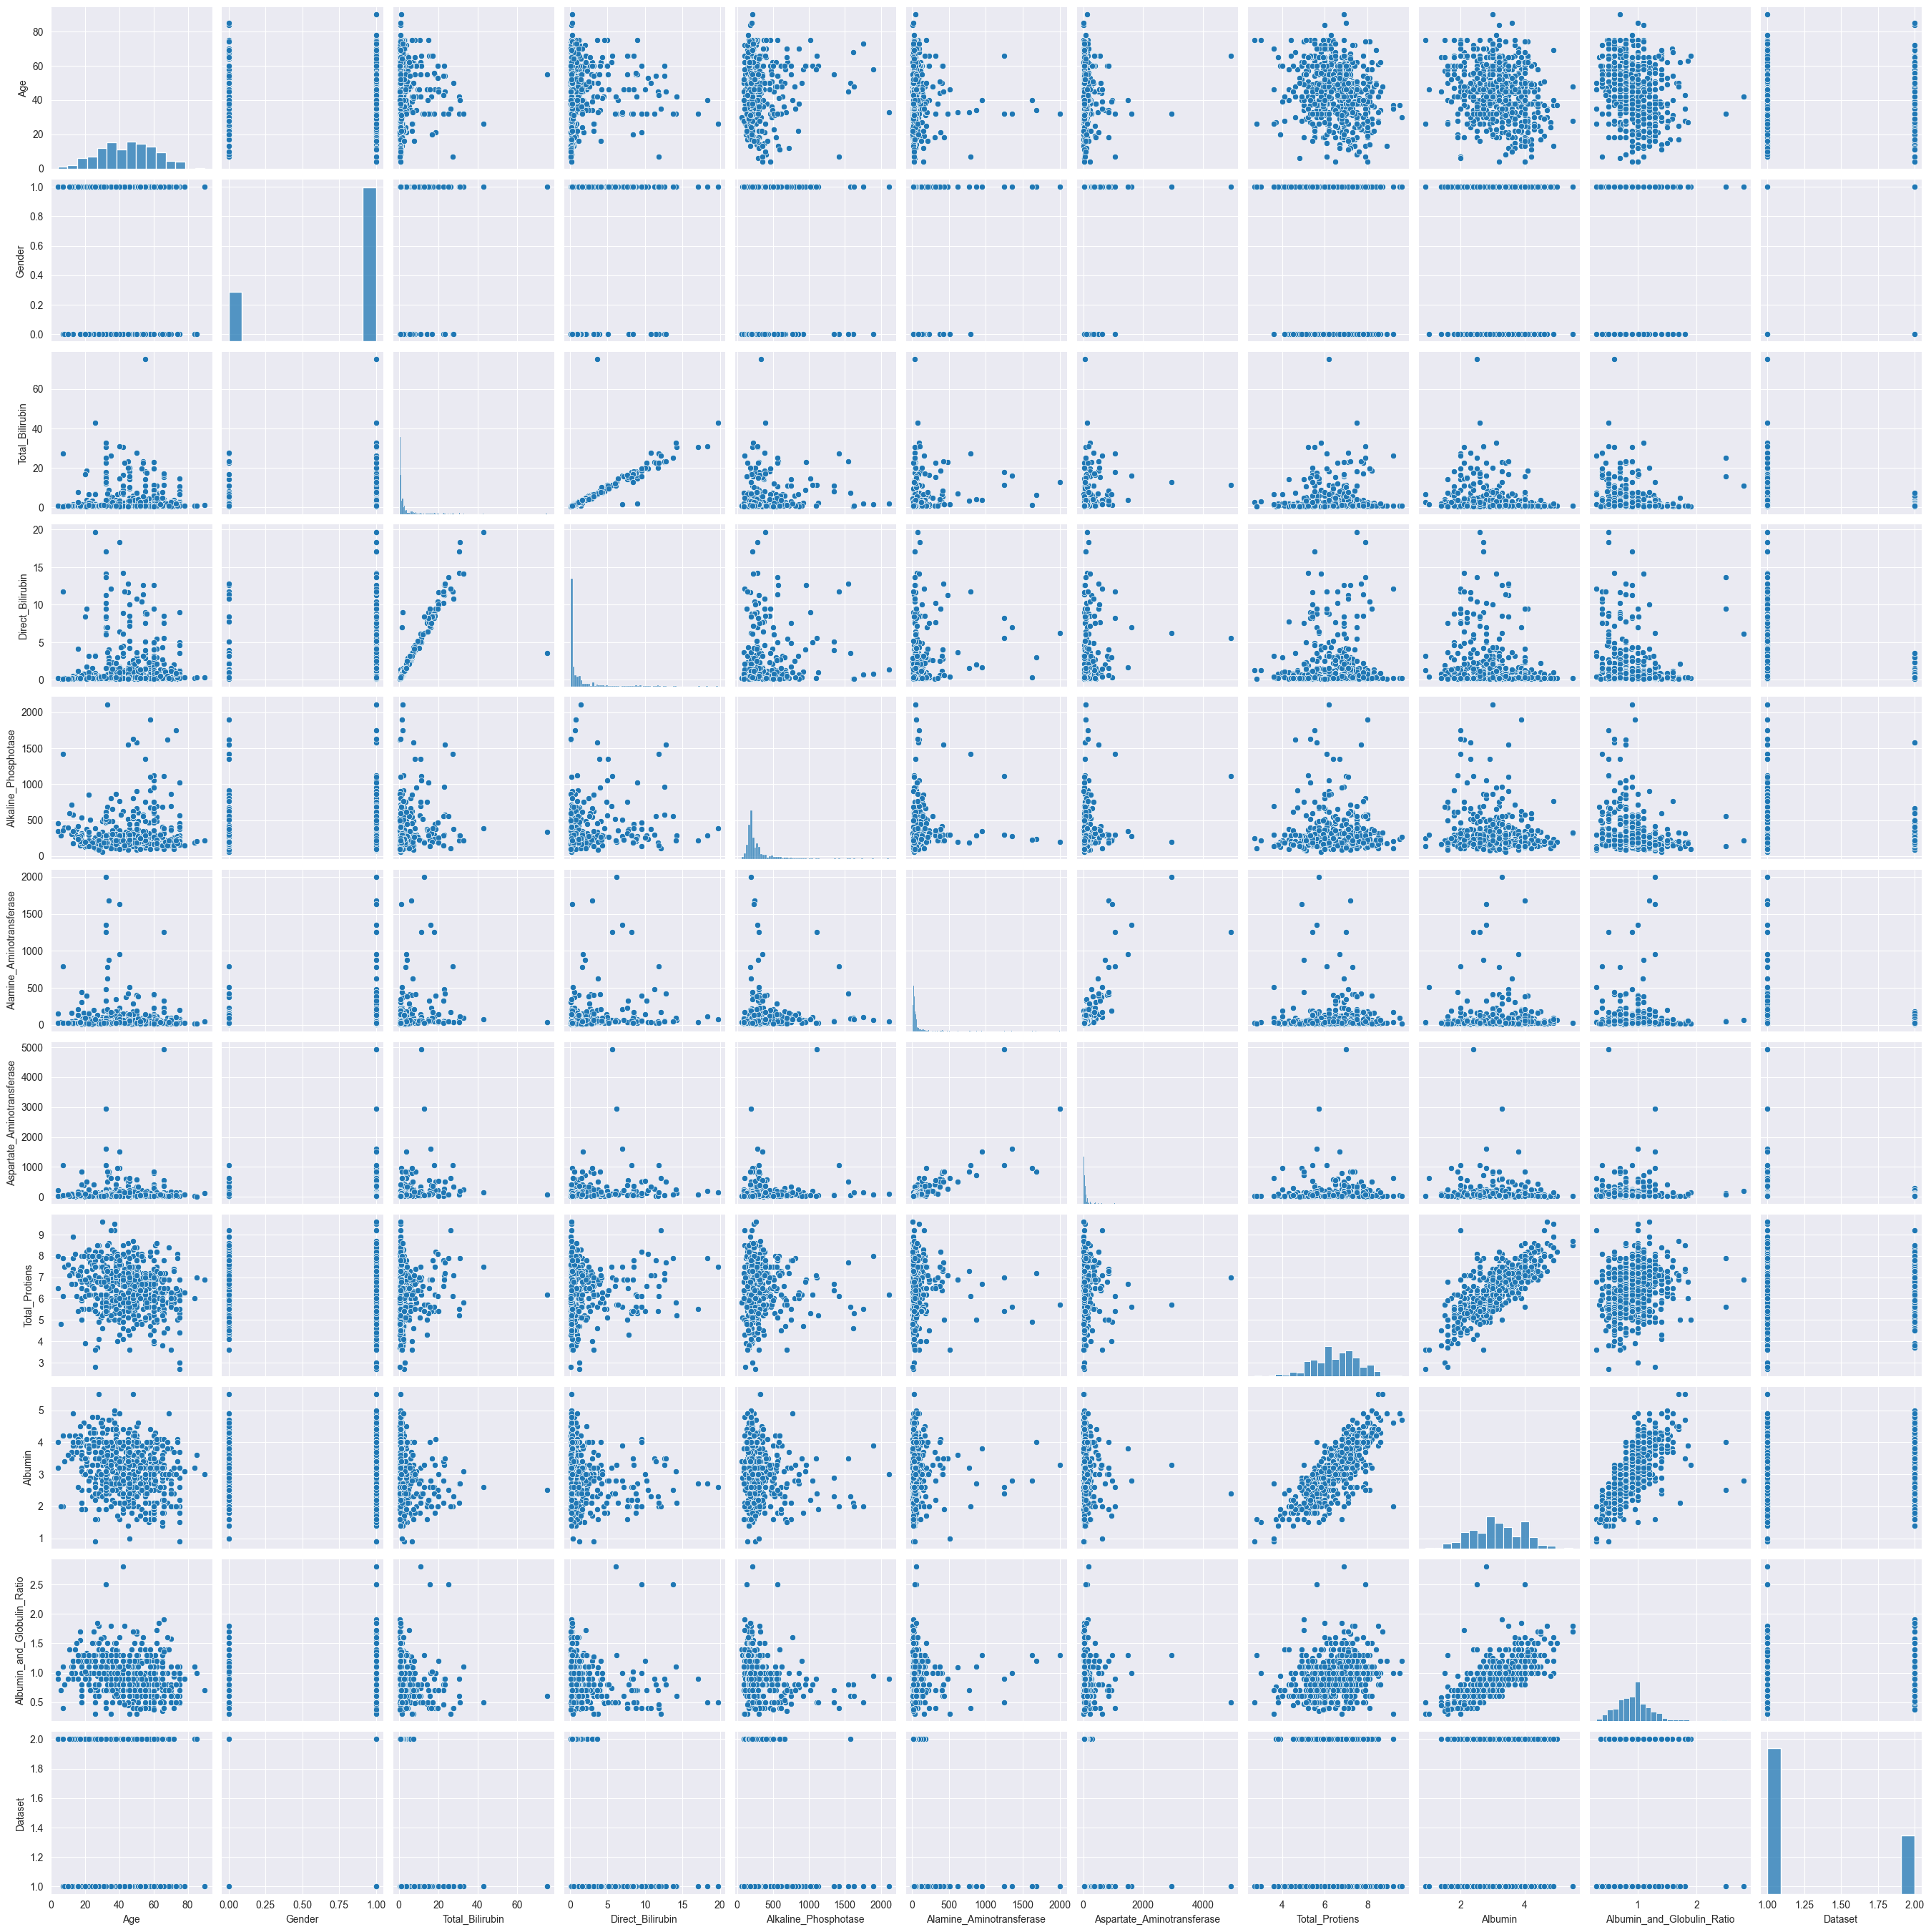

In [41]:
sns.pairplot(df)

In [42]:
corr = df.corr()
corr

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216089,-0.137351
Gender,0.056560,1.000000,0.089291,0.100436,-0.027496,0.082332,0.080336,-0.089121,-0.093799,-0.003404,-0.082416
Total_Bilirubin,0.011763,0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206159,-0.220208
Direct_Bilirubin,0.007529,0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200004,-0.246046
Alkaline_Phosphotase,0.080425,-0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233960,-0.184866
Alamine_Aminotransferase,-0.086883,0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002374,-0.163416
Aspartate_Aminotransferase,-0.019910,0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070024,-0.151934
Total_Protiens,-0.187461,-0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233904,0.035008
Albumin,-0.265924,-0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686322,0.161388
Albumin_and_Globulin_Ratio,-0.216089,-0.003404,-0.206159,-0.200004,-0.233960,-0.002374,-0.070024,0.233904,0.686322,1.000000,0.162319


<Axes: >

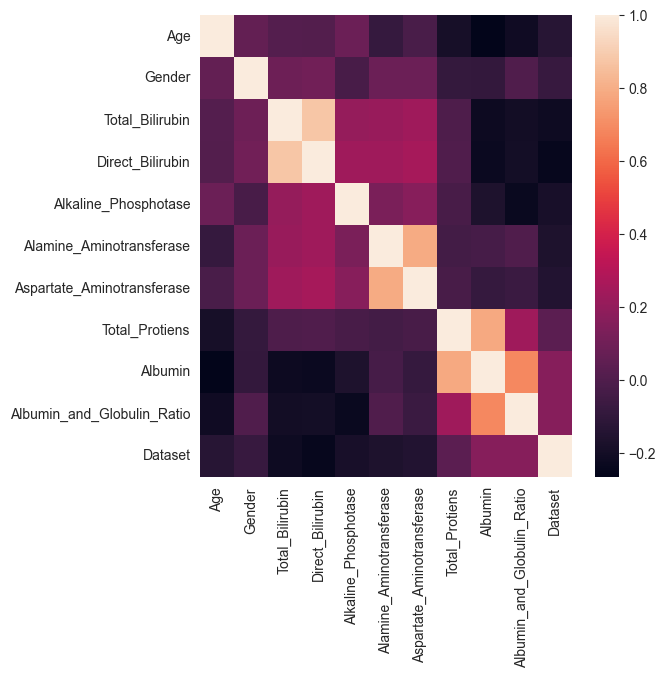

In [43]:
plt.figure(figsize=(6,6))
sns.heatmap(df.corr())

In [45]:
df = df.drop_duplicates()

In [46]:
df.shape

(570, 11)

In [47]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [48]:
y=df.Dataset
X=df.drop('Dataset', axis=1)

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [50]:
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=0, stratify=y)

In [51]:
train_mean = X_train.mean()
train_std = X_train.std()

In [52]:
X_train = (X_train - train_mean) / train_std
X_train.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,4.560000e+02,4.560000e+02,4.560000e+02,4.560000e+02,4.560000e+02,4.560000e+02,4.560000e+02,4.560000e+02,4.560000e+02,4.560000e+02
mean,-1.051790e-16,-2.337312e-17,-5.648503e-17,-4.090295e-17,-7.693651e-17,3.116416e-17,7.791039e-18,2.025670e-16,-2.103580e-16,1.460820e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.493613e+00,-1.730151e+00,-4.462067e-01,-4.941171e-01,-9.672230e-01,-3.750204e-01,-4.243952e-01,-3.537063e+00,-2.756368e+00,-2.091085e+00
25%,-7.421389e-01,0.000000e+00,-4.010346e-01,-4.602246e-01,-4.781332e-01,-3.031546e-01,-3.573297e-01,-7.110484e-01,-7.311453e-01,-7.941039e-01
50%,4.141549e-03,5.767169e-01,-3.709198e-01,-4.263321e-01,-3.437678e-01,-2.443553e-01,-2.790866e-01,1.367560e-01,2.831314e-02,1.174901e-02
75%,7.961126e-01,5.767169e-01,-1.262376e-01,-8.740700e-02,4.320435e-02,-1.032369e-01,-8.347890e-02,7.019589e-01,7.877716e-01,5.028769e-01
max,2.745580e+00,5.767169e-01,1.077153e+01,6.148815e+00,6.914110e+00,1.002592e+01,1.270256e+01,2.774369e+00,2.939571e+00,5.042310e+00


In [53]:
X_test = (X_test - train_mean) / train_std
X_test.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000
mean,-0.025250,0.050589,-0.106623,-0.102272,0.081675,-0.052896,0.099696,-0.275578,-0.181537,0.050071
std,0.950275,0.972208,0.670430,0.779795,1.252670,0.707897,2.117141,1.097441,1.033926,1.158481
min,-2.493613,-1.730151,-0.461264,-0.494117,-0.808134,-0.364567,-0.415453,-3.631263,-2.882944,-2.091085
25%,-0.726909,0.576717,-0.412328,-0.460225,-0.495332,-0.310994,-0.357330,-0.899449,-0.857722,-0.794104
50%,0.004142,0.576717,-0.370920,-0.426332,-0.326569,-0.241742,-0.296971,-0.145845,-0.224840,-0.113189
75%,0.659041,0.576717,-0.193996,-0.087407,0.043204,-0.130677,-0.081243,0.419357,0.661195,0.648787
max,2.014530,0.576717,2.896529,3.437414,7.834244,6.105970,21.568617,2.868570,1.926959,6.015045


In [54]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [55]:
y_pred = lr.predict(X_test)

In [56]:
print(accuracy_score(y_train, lr.predict(X_train)))
lr_acc = accuracy_score(y_test, lr.predict(X_test))
print(lr_acc)
print(confusion_matrix(y_test, lr.predict(X_test)))
print(classification_report(y_test, lr.predict(X_test)))

0.7192982456140351
0.7631578947368421
[[79  2]
 [25  8]]
              precision    recall  f1-score   support

           1       0.76      0.98      0.85        81
           2       0.80      0.24      0.37        33

    accuracy                           0.76       114
   macro avg       0.78      0.61      0.61       114
weighted avg       0.77      0.76      0.71       114



In [57]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [58]:
knn.predict(X_test)

array([2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 2, 1, 1], dtype=int64)

In [59]:
print(accuracy_score(y_train, lr.predict(X_train)))
knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(knn_acc)
print(confusion_matrix(y_test, knn.predict(X_test)))
print(classification_report(y_test, knn.predict(X_test)))

0.7192982456140351
0.6754385964912281
[[65 16]
 [21 12]]
              precision    recall  f1-score   support

           1       0.76      0.80      0.78        81
           2       0.43      0.36      0.39        33

    accuracy                           0.68       114
   macro avg       0.59      0.58      0.59       114
weighted avg       0.66      0.68      0.67       114



In [79]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [81]:
print(accuracy_score(y_train, dtc.predict(X_train)))
dtc_acc = accuracy_score(y_test, dtc.predict(X_test))
print(dtc_acc)
print(confusion_matrix(y_test, dtc.predict(X_test)))
print(classification_report(y_test, dtc.predict(X_test)))

1.0
0.5701754385964912
[[56 25]
 [24  9]]
              precision    recall  f1-score   support

           1       0.70      0.69      0.70        81
           2       0.26      0.27      0.27        33

    accuracy                           0.57       114
   macro avg       0.48      0.48      0.48       114
weighted avg       0.57      0.57      0.57       114



In [83]:
rand_clf = RandomForestClassifier(criterion='entropy', max_depth=15, max_features=0.75, min_samples_leaf=7, min_samples_split=3, n_estimators = 130)

In [85]:
rand_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, max_features=0.75,
                       min_samples_leaf=7, min_samples_split=3,
                       n_estimators=130)

In [87]:
print(accuracy_score(y_train, rand_clf.predict(X_train)))
rand_clf_acc = accuracy_score(y_test, rand_clf.predict(X_test))
print(rand_clf_acc)
print(confusion_matrix(y_test, rand_clf.predict(X_test)))
print(classification_report(y_test, rand_clf.predict(X_test)))

0.8991228070175439
0.7631578947368421
[[79  2]
 [25  8]]
              precision    recall  f1-score   support

           1       0.76      0.98      0.85        81
           2       0.80      0.24      0.37        33

    accuracy                           0.76       114
   macro avg       0.78      0.61      0.61       114
weighted avg       0.77      0.76      0.71       114



In [109]:
models = pd.DataFrame({
    'Model':['Logistic Regreesion','KNN', 'Decision Tree Classifier', 'Random Forest Classifier'],
    'Score':[100*round(lr_acc, 4), 100*round(knn_acc, 4), 100*round(dtc_acc, 4), 100*round(rand_clf_acc, 4)]
})

In [111]:
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Logistic Regreesion,76.32
3,Random Forest Classifier,76.32
1,KNN,67.54
2,Decision Tree Classifier,57.02
